# Convolutional Neural Networks¶


In this notebook, we train an MLP to classify images from the CIFAR-10 database.



# 1. Load CIFAR-10 Database¶


In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

C:\Users\santosh sharma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\santosh sharma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\santosh sharma\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\santosh sharma\Anaconda3\lib\site-p

# 2. Visualize the First 24 Training Images¶


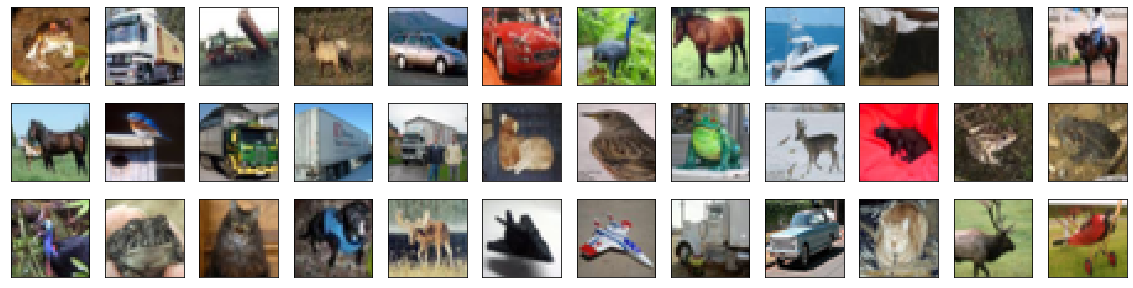

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

# 3. Rescale the Images by Dividing Every Pixel in Every Image by 255¶


In [4]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


# 4. Break Dataset into Training, Testing, and Validation Sets¶


In [5]:

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


# 5. Define the Model Architecture¶


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape = x_train.shape[1:]))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               512512    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 3,590,642

# 6. Compile the Model¶


In [7]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

# 7. Train the Model¶


In [8]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=20,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=2, shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 45000 samples, validate on 5000 samples
Epoch 1/20
 - 156s - loss: 1.9420 - acc: 0.2906 - val_loss: 1.7943 - val_acc: 0.3626

Epoch 00001: val_loss improved from inf to 1.79426, saving model to MLP.weights.best.hdf5
Epoch 2/20
 - 151s - loss: 1.7590 - acc: 0.3631 - val_loss: 1.7416 - val_acc: 0.3750

Epoch 00002: val_loss improved from 1.79426 to 1.74155, saving model to MLP.weights.best.hdf5
Epoch 3/20
 - 149s - loss: 1.6802 - acc: 0.3991 - val_loss: 1.6949 - val_acc: 0.3942

Epoch 00003: val_loss improved from 1.74155 to 1.69491, saving model to MLP.weights.best.hdf5
Epoch 4/20
 - 138s - loss: 1.6232 - acc: 0.4220 - val_loss: 1.5932 - val_acc: 0.4126

Epoch 00004: val_loss improved from 1.69491 to 1.59319, saving model to MLP.weights.best.hdf5
Epoch 5/20
 - 142s - loss: 1.5803 - acc: 0.4378 - val_loss: 1.5472 - val_acc: 0.4452

Epoch 00005: val_loss improved from 1.59319 to 1.54718,

# 8. Load the Model with the Best Classification Accuracy on the Validation Set¶


In [11]:
# load the weights that yielded the best validation accuracy
model.load_weights('MLP.weights.best.hdf5')

# 9. Calculate Classification Accuracy on Test Set¶


In [12]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.5093
